In [1]:
# utilities
import pickle
import re
import numpy as np
import pandas as pd
import string
# plotting
import seaborn as sns
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# sklearn
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from sklearn.metrics import accuracy_score

In [2]:

ListOfStopwords = stopwords.words("english") + ["quot", "going", "twitpic", "I'm", "I've", "amp", "u", "im", "get",
                                                  "got", 'a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [3]:

# ************************* Now importing the data Set  ******************************************************************

# The data set has been taken from kaggle and has a collection of over 1.6 million tweets


df = pd.read_csv(r'C:\Users\Swati Khanduri\training.1600000.processed.noemoticon.csv',names=["Sentiment", "ID", "Date", "Query", "User", "Tweet"], encoding='latin-1')
print(df.head(10))
df.info()
print(df.dtypes)
print("The length of the dataset is:--> ", len(df))
print(df.shape)



   Sentiment          ID                          Date     Query  \
0          0  1467810369  Mon Apr 06 22:19:45 PDT 2009  NO_QUERY   
1          0  1467810672  Mon Apr 06 22:19:49 PDT 2009  NO_QUERY   
2          0  1467810917  Mon Apr 06 22:19:53 PDT 2009  NO_QUERY   
3          0  1467811184  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
4          0  1467811193  Mon Apr 06 22:19:57 PDT 2009  NO_QUERY   
5          0  1467811372  Mon Apr 06 22:20:00 PDT 2009  NO_QUERY   
6          0  1467811592  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
7          0  1467811594  Mon Apr 06 22:20:03 PDT 2009  NO_QUERY   
8          0  1467811795  Mon Apr 06 22:20:05 PDT 2009  NO_QUERY   
9          0  1467812025  Mon Apr 06 22:20:09 PDT 2009  NO_QUERY   

              User                                              Tweet  
0  _TheSpecialOne_  @switchfoot http://twitpic.com/2y1zl - Awww, t...  
1    scotthamilton  is upset that he can't update his Facebook by ...  
2         mattycus  @Kenichan I div

In [4]:
# Cleaning The data to avoid unnecessary details which are present in the dataset like Query and ID columns

# drop query & ID columns for cleaning
df = df.drop(['Query', 'ID'], axis=1)
print(df.sample(5))

# In the dataset used the positive sentiment has been classified with a numeric value of 4, so I change it to 1 for ease

df['Sentiment'] = df['Sentiment'].replace(4, 1)
print(df.sample(10))

# *************** Separating the positive and Negative Tweets Accordingly *******************************

data_pos = df[df['Sentiment'] == 1]
data_neg = df[df['Sentiment'] == 0]

# Taking only 1/4th of the positive and negative tweets collected just to reduce the complexity and the overhead on the machine

data_pos = data_pos.iloc[:int(200000)]
data_neg = data_neg.iloc[:int(200000)]

# Combining the Reduced Positive and negative tweets into a new dataset

dataset = pd.concat([data_pos, data_neg])

         Sentiment                          Date          User  \
1448450          4  Sun Jun 07 00:07:38 PDT 2009     rhubee_02   
759960           0  Tue Jun 23 09:11:56 PDT 2009  xpurplegirlx   
1171156          4  Sun May 31 06:48:01 PDT 2009       JayyLiz   
1283183          4  Tue Jun 02 02:30:59 PDT 2009      SarJay16   
905917           4  Mon May 04 05:38:27 PDT 2009      hlvanrip   

                                                     Tweet  
1448450                                         Hi there!   
759960               doesnt understand twitter !!!  HELP !  
1171156                  so, graduation weekend = amazing   
1283183                                 shayde, your ugly   
905917   finally feel back into swing of things here at...  
         Sentiment                          Date           User  \
590960           0  Wed Jun 17 20:57:28 PDT 2009         m47713   
919876           1  Sun May 10 03:58:11 PDT 2009       SAGasser   
856326           1  Tue Apr 21 02:36

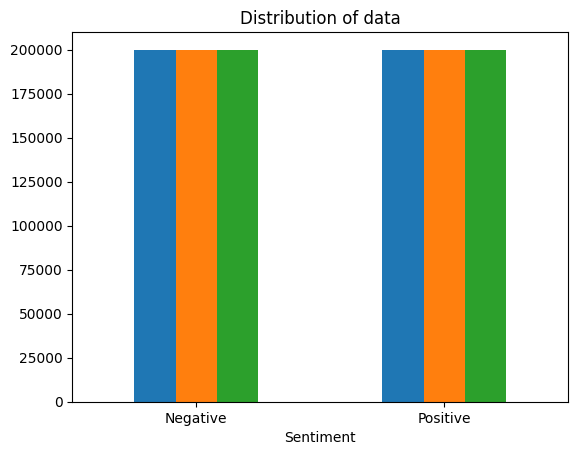

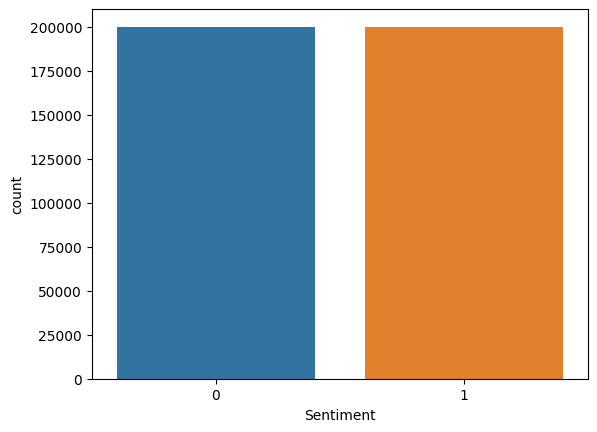

        Sentiment                          Date             User  \
885714          1  Sun May 03 05:54:15 PDT 2009          Alero82   
956294          1  Sun May 17 04:46:41 PDT 2009           eidann   
898057          1  Sun May 03 22:47:02 PDT 2009        AnaMenudo   
23506           0  Sun Apr 19 05:46:44 PDT 2009       GracieBean   
185361          0  Fri May 29 20:31:33 PDT 2009       Monica2112   
103973          0  Thu May 14 10:12:51 PDT 2009    kris10smith07   
65524           0  Sun May 03 16:57:55 PDT 2009  wideeyedflutter   
156293          0  Thu May 28 21:08:58 PDT 2009         kmishael   
868013          1  Sat May 02 04:26:36 PDT 2009       mattchewww   
852736          1  Mon Apr 20 23:26:02 PDT 2009       barryroodt   

                                                    Tweet  
885714          back home!! time to track down the woman   
956294                @hesa you're just talented i guess   
898057  @annamack23 hi anna!  have a great week and do...  
23506      

In [5]:
# ******************** Plotting Graphs to show the respective count of positive and negative tweets in dataset ***********


ax = dataset.groupby('Sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative', 'Positive'], rotation=0)
plt.show()
# Storing data in lists.

text, sentiment = list(dataset['Tweet']), list(dataset['Sentiment'])
plt.show()

sns.countplot(x='Sentiment', data=dataset)
plt.show()

# Now converting the Tweets in the new dataset into lowercase for better generalization

dataset['Tweet']= dataset['Tweet'].str.lower()
print(dataset.sample(10))

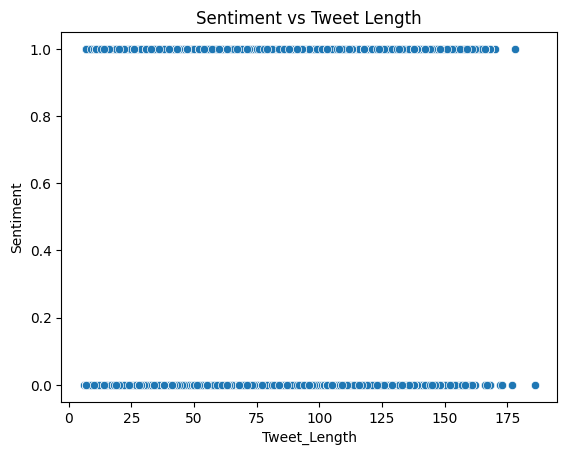

In [6]:

# Scatter plot to show sentiment versus tweet length
dataset['Tweet_Length'] = dataset['Tweet'].apply(len)
sns.scatterplot(x='Tweet_Length', y='Sentiment', data=dataset)
plt.title('Sentiment vs Tweet Length')
plt.show()

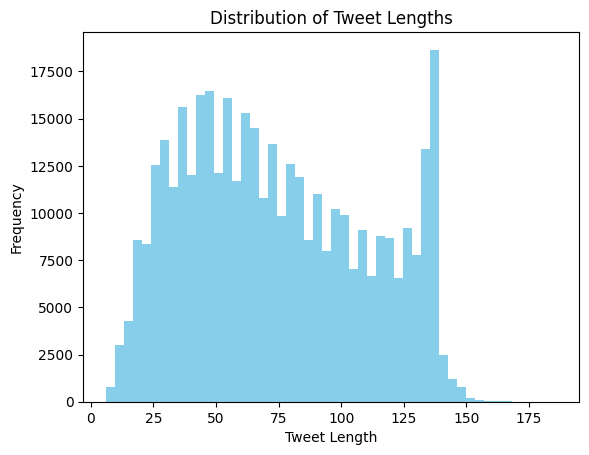

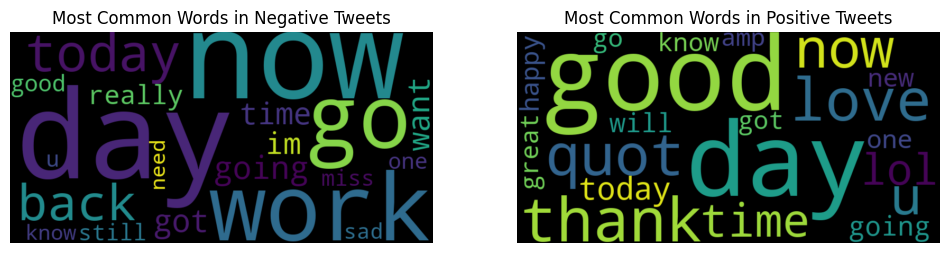

In [7]:
# Plotting a histogram to show the distribution of tweet lengths
plt.hist(dataset['Tweet'].apply(len), bins=50, color='skyblue')
plt.xlabel('Tweet Length')
plt.ylabel('Frequency')
plt.title('Distribution of Tweet Lengths')
plt.show()

# Assuming you have loaded your dataset into the 'dataset' variable earlier
X = dataset['Tweet']  # 'Tweet' column contains the tweet text
y = dataset['Sentiment']  # 'Sentiment' column contains the sentiment labels (0 for negative, 1 for positive)

# Now you can use X and y for further processing

# Bar plot with WordClouds to show most common words in positive and negative tweets
data_neg = X[y == 0]
data_pos = X[y == 1]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
wc_neg = WordCloud(max_words=20, width=800, height=400, collocations=False).generate(" ".join(data_neg))
plt.imshow(wc_neg, interpolation='bilinear')
plt.title('Most Common Words in Negative Tweets')
plt.axis("off")

plt.subplot(1, 2, 2)
wc_pos = WordCloud(max_words=20, width=800, height=400, collocations=False).generate(" ".join(data_pos))
plt.imshow(wc_pos, interpolation='bilinear')
plt.title('Most Common Words in Positive Tweets')
plt.axis("off")

plt.show()

In [8]:
# ***************** Cleaning and Removing all the Unnecessary Details that which do not contribute to the analysis or classification ******************
#Firsty removing all the stop words

STOPWORDS = set(ListOfStopwords)
def cleaning_stopwords(Tweet):
    return " ".join([word for word in str(Tweet).split() if word not in STOPWORDS])
dataset['Tweet'] = dataset['Tweet'].apply(lambda Tweet: cleaning_stopwords(Tweet))
print(dataset.sample(10))

# Cleaning/Removing all the punctuations


english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(Tweet):
    translator = str.maketrans('', '', punctuations_list)
    return Tweet.translate(translator)
dataset['Tweet']= dataset['Tweet'].apply(lambda x: cleaning_punctuations(x))
print(dataset.sample(10))

# Cleaning/Removing Repeated Characters

def cleaning_repeating_char(Tweet):
    return re.sub(r'(.)1+', r'1', Tweet)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_repeating_char(x))
print(dataset.sample(10))

# Cleaning/Removing All the Urls from the Dataset

def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_URLs(x))
print(dataset.head(10))

# Cleaning/Removing All the Numeric Values

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: cleaning_numbers(x))
print(dataset.head(10))



        Sentiment                          Date             User  \
155504          0  Thu May 28 20:45:44 PDT 2009  lalalovelylinny   
30108           0  Sun Apr 19 23:47:03 PDT 2009        shutupmeg   
92105           0  Sun May 10 20:09:52 PDT 2009         Silentbx   
810019          1  Tue Apr 07 06:59:49 PDT 2009            reedi   
831727          1  Sun Apr 19 04:23:53 PDT 2009           xyzzyz   
137801          0  Fri May 22 01:09:07 PDT 2009      brittnyjean   
123725          0  Mon May 18 01:06:29 PDT 2009     HarryMcBride   
886929          1  Sun May 03 06:59:38 PDT 2009       nelliekwon   
808832          1  Tue Apr 07 05:59:12 PDT 2009   janbaumgartner   
180086          0  Fri May 29 17:49:11 PDT 2009     KerrySquires   

                                                    Tweet  Tweet_Length  
155504                                needs study spanish            27  
30108   (@shutup) failed celebrate 1337th scrobble lastfm            62  
92105   twitters feelin sorta

In [9]:
#*********** Now Breaking or Converting each Tweet into Smaller Individual Units called Tokens ***********************
# Tokenizing the tweets

tokenizer = RegexpTokenizer("[\w']+")
dataset['Tweet'] = dataset['Tweet'].apply(tokenizer.tokenize)
print(dataset['Tweet'].head(10))

# Removing Negations from the Tweets
#used in 179
def Negation(sentence):
  '''
  Input: Tokenized sentence (List of words)
  Output: Tokenized sentence with negation handled (List of words)
  '''
  for i in range(len(sentence)):
      if sentence[i-1] in ['not',"n't"]:
          antonyms = []
          for syn in wordnet.synsets(sentence[i]):
              temp = 0
              for l in syn.lemmas():
                  if l.antonyms():
                      antonyms.append(l.antonyms()[0].name())
              max_dissimilarity = 0
              for ant in antonyms:
                  syns = wordnet.synsets(ant)
                  w2 = syns[0].name()
                  syns = wordnet.synsets(sentence[i])
                  w1 = syns[0].name()
                  word1 = wordnet.synset(w1)
                  word2 = wordnet.synset(w2)
                  if isinstance(word1.wup_similarity(word2), float) or isinstance(word1.wup_similarity(word2), int):
                      temp = 1 - word1.wup_similarity(word2)
                  if temp>max_dissimilarity:
                      max_dissimilarity = temp
                      antonym_max = ant
                      sentence[i] = antonym_max
                      sentence[i-1] = ''
  while '' in sentence:
      sentence.remove('')
  return sentence


dataset['Tweet']= dataset['Tweet'].apply(lambda token: Negation(token))
print(dataset['Tweet'].sample(20))
# Stemming The Tweets

st = nltk.PorterStemmer()
def stemming_on_text(data):
    Tweet = [st.stem(word) for word in data]
    return data
dataset['Tweet']= dataset['Tweet'].apply(lambda x: stemming_on_text(x))
print(dataset['Tweet'].head())

# Lemmatization of The Tweets i.e. Creating Something meaningful base word or the root word from the individual words
print('\n \n')
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['Tweet'] = dataset['Tweet'].apply(lambda x: lemmatizer_on_text(x))
print(dataset['Tweet'].head(10))


800000                [love, healthuandpets, guys, r, best]
800001    [meeting, one, besties, tonight, cant, wait, g...
800002    [darealsunisakim, thanks, twitter, add, sunisa...
800003    [sick, really, cheap, hurts, much, eat, real, ...
800004                    [lovesbrooklyn, effect, everyone]
800005    [productoffear, tell, burst, laughing, really,...
800006    [rkeithhill, thans, response, ihad, already, f...
800007    [keepinupwkris, jealous, hope, great, time, ve...
800008    [tommcfly, ah, congrats, mr, fletcher, finally...
800009    [evoip, responded, stupid, cat, helping, type,...
Name: Tweet, dtype: object
46373                  [stayed, way, late, gonna, pay, one]
175700                   [want, another, shake, ritasbadly]
103480    [girltrumpet, makes, feel, happier, move, go, ...
140850                   [calmol, happiness, warm, gun, ha]
945211    [monkey, class, gotta, love, flying, mates, as...
84972     [jakeyboy, cute, little, bum, online, please, ...
23939     [ok

In [10]:
# ****************************** Separating Input Features and labels ********************************

''' Briefly, feature is input; label is output. This applies to both classification and regression problems. 
A feature is one column of the data in your input set. 
For instance, if you're trying to predict the type of pet someone will choose, your input features might include age,
 home region, family income, etc.'''

X=df.Tweet
y=df.Sentiment


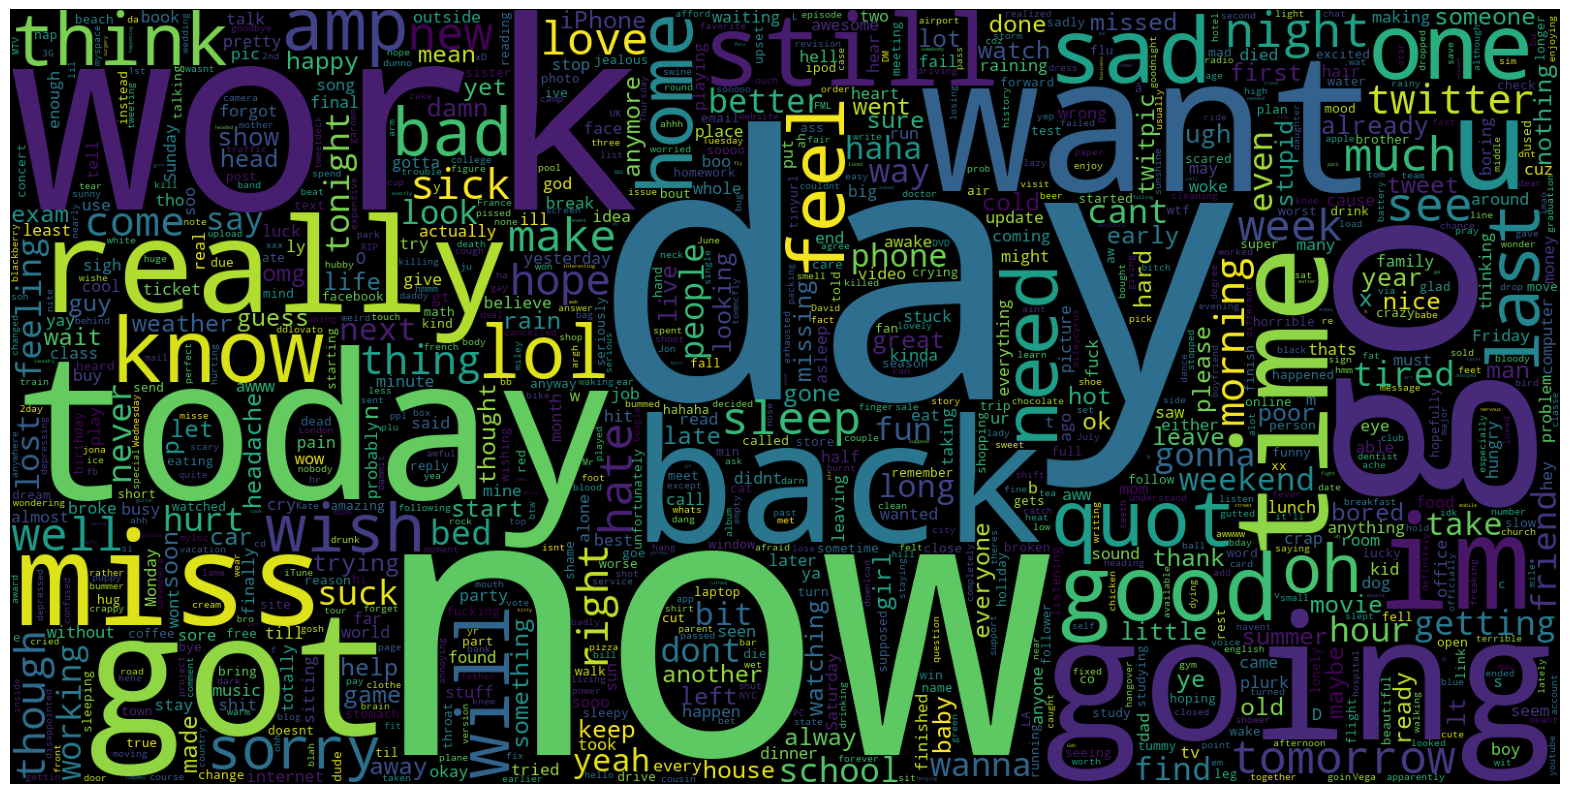

In [ ]:
# ******************************* Plotting A WordCloud for negative Words found in the dataset *************************************
data_neg = df['Tweet'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)
plt.axis("off")
plt.show()

# ******************************* Plotting a WordCloud for Positive Words Found in the dataset *********************************

data_pos = df['Tweet'][800000:]
wc = WordCloud(max_words =  1000 , width = 1600 , height = 800,
              collocations=False).generate(" ".join(data_pos))
plt.figure(figsize = (20,20))
plt.imshow(wc)
plt.axis("off")
plt.show()


In [ ]:
# ******************************** Splitting The Model into Training And Testing Sub Datasets ********************************

# I have kept 95 Percent Of the Data As Training DataSet and the remaining 5 Percent as the Testing DataSet



X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

# Fitting The TDF Vectorizer
''' This will Assign a value to an entity according to its importance in the entire Dataset/Document and puts it in a vector '''

print('\n \n')

vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)

print('Total Feature Words in the DataSet:-----> ', len(vectoriser.get_feature_names_out()), '\n\n\n')

X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
'''**********************************  EVALUATION OF THE MODEL *********************************************'''

def model_Evaluate(model):

    # Predicting values for the Test DataSet

    y_pred = model.predict(X_test)

    # Print the evaluation metrics for the dataset.

    print(classification_report(y_test, y_pred))

    # Compute and plot the Confusion matrix

    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative','Positive']
    group_names = ['True Negative','False Positive', 'False Negative','True Positive']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot = labels, cmap = 'coolwarm',fmt = '',
    xticklabels = categories, yticklabels = categories)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    plt.show()

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)
# Receiver operating characteristic curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='red', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE FOR LOGISTIC REGRESSION')
plt.legend(loc="lower right")
plt.show()
print(LRmodel.score(X_train, y_train), '\n')
y_pred = LRmodel.predict(X_test)
print(accuracy_score(y_test, y_pred), '\n')

In [ ]:

# import pickle
# with open(r'C:\Users\Swati Khanduri\my_vectoriser_pickle', 'wb') as files:
#     pickle.dump(vectoriser, files)

# with open(r'C:\Users\Swati Khanduri\my_vectoriser_pickle', 'wb') as filesss:
#     pickle.dump(LRmodel, filesss)

# with open('vectoriser_pickle', 'wb') as f:
#     pickle.dump(vectoriser, f)

# with open('LRmodel_pickle', 'wb') as file:
#     pickle.dump(LRmodel, file)


In [ ]:
# Load the trained model and vectorizer
with open(r'C:\Users\Swati Khanduri\OneDrive\Desktop\main\my_vectorizer.pickle', 'rb') as file:
    vectorizer = pickle.load(file)

with open(r'C:\Users\Swati Khanduri\OneDrive\Desktop\main\my_model.pickle', 'rb') as file:
    model = pickle.load(file)
def preprocess_tweet(tweet):
    tweet = tweet.lower()
    tweet = cleaning_stopwords(tweet)
    tweet = cleaning_punctuations(tweet)
    tweet = cleaning_repeating_char(tweet)
    tweet = cleaning_URLs(tweet)
    tweet = cleaning_numbers(tweet)
    tokenizer = RegexpTokenizer("[\w']+")
    tweet = tokenizer.tokenize(tweet)
    tweet = Negation(tweet)
    st = nltk.PorterStemmer()
    tweet = [st.stem(word) for word in tweet]
    lm = nltk.WordNetLemmatizer()
    tweet = [lm.lemmatize(word) for word in tweet]
    return ' '.join(tweet)



In [ ]:
# Get user input and perform preprocessing
user_input = input("Enter a sentence: ")
preprocessed_input = preprocess_tweet(user_input)

# Vectorize the preprocessed input
input_sentence = vectorizer.transform([preprocessed_input])

# Predict the sentiment using the trained model
predicted_sentiment = model.predict(input_sentence)[0]

# Output the result
if predicted_sentiment >= 0.6:
    print("The sentiment is Positive.")
elif predicted_sentiment <= 5:
    print("The sentiment is Negative.")
else:
    print("The sentiment is Neutral.")